# Step 3 : Exploratory Data Analysis (EDA) for Veterans earings(p_income)

In this section, we identify the existing patterns between original categorical variables and p_income in two datasets(smdf and bdf) that were seperated from the original data. We will do another EDA on transformed/encoded data with FINDJOB later. This is because most relationship between variables and FINDJOB are categorical-categorical relationship. This kind of relationship can only be shown in graphs after variable transformation(categorical variables encoding). Technically, we can do EDA(both p_income and FINDJOB) all together after variable transformation. However, it is easier to interpret the results with text labels rather then encoded labels. This is why we do EDA for p_income first. 


1. EDA with the speed to find a job : FINDJOB 
2. EDA with veteran earnings : p_income

### Import Data and double check for missing data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file
smdf = pd.read_csv("Findjob_clean.csv")

In [3]:
bdf = pd.read_csv("Satilife_clean.csv")

In [4]:
smdf

,SATLIFEb,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,VABENEFITS,...,MILHELPJOB,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Branch,p_income
0,Very Satisfied,>20 years,E1-E6,Married,Yes,Yes,Not injured,Somewhat well,Very Easy,Yes,...,Helped a lot,No,65+,Male,High school degree,No,White,Married/Live with a partner,Muti-Branch,31500
1,Very Satisfied,>20 years,WO1-WO5,Married,Yes,No,Not injured,Somewhat well,Somewhat Easy,Yes,...,Helped a bit,Yes,50-64,Male,MS/PHD degree,No,White,Married/Live with a partner,Army,75000
2,Somewhat Satisfied,>20 years,E7-E9,Married,Yes,No,Not injured,Somewhat well,Somewhat Easy,Yes,...,Helped a lot,No,50-64,Male,Associate degree,No,White,Married/Live with a partner,Navy,31500
3,Very Satisfied,>20 years,O1-O10,Married,No,Yes,Not injured,Somewhat well,Somewhat difficult,Yes,...,Helped a lot,Yes,50-64,Male,MS/PHD degree,No,White,Married/Live with a partner,Air_Force,62500
4,Somewhat Satisfied,>20 years,E1-E6,Married,Yes,Yes,Injured out of combat,Somewhat well,Somewhat Easy,No,...,Helped a lot,No,50-64,Male,Some college(no degree),No,Black,Married/Live with a partner,Marines,44000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Somewhat Dissatisfied,5-9 years,E7-E9,Married,No,No,Not injured,Not too well,Somewhat Easy,Yes,...,Neither,Yes,30-49,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,Navy,63000
245,Very Satisfied,3-4 years,E1-E6,Not Married,No,Yes,Not injured,Very well,Somewhat Easy,Yes,...,Neither,Yes,30-49,Female,High school degree,No,White,Divorced/Seperated/Widowed,Navy,25000
246,Somewhat Satisfied,>20 years,E1-E6,Not Married,No,Yes,Not injured,Somewhat well,Somewhat difficult,Yes,...,Helped a bit,Yes,50-64,Male,Some college(no degree),No,White,Married/Live with a partner,Navy,31500
247,Very Satisfied,>20 years,O1-O10,Married,Yes,Yes,Not injured,Somewhat well,Somewhat difficult,Yes,...,Neither,Yes,50-64,Male,Bachelors degree,No,White,Married/Live with a partner,Marines,62500


In [5]:
smdf.columns

Index(['SATLIFEb', 'YEARSERV', 'RANK', 'MARRACTIV', 'PARACTIV', 'COMBAT',
       'INJURED', 'MILTOCIV', 'CIVADJ', 'VABENEFITS', 'CIVADJPROBa',
       'CIVADJPROBb', 'CIVADJISSc', 'CIVADJISSe', 'LOOKJOB', 'SCHOOL',
       'MILJOBSKILLS', 'FINDJOB', 'JOBQUAL', 'FIRSTJOB', 'MILHELPJOB',
       'TRAUMA1', 'F_AGECAT', 'F_SEX', 'F_EDUCCAT2', 'F_HISP', 'F_RACETHN',
       'F_MARITAL', 'Branch', 'p_income'],
      dtype='object')

In [6]:
bdf

,SATLIFEb,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,VABENEFITS,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
0,Somewhat Satisfied,>20 years,E7-E9,Married,Yes,No,Injured out of combat,Not too well,Somewhat difficult,Yes,...,Yes,50-64,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Army,44000
1,Somewhat Satisfied,10-19 years,E7-E9,Married,Yes,No,Injured out of combat,Not too well,Somewhat difficult,Yes,...,No,50-64,Male,Some college(no degree),No,White,Divorced/Seperated/Widowed,post_911,Army,125000
2,Somewhat Satisfied,10-19 years,E1-E6,Married,Yes,No,Not injured,Not too well,Somewhat Easy,Yes,...,No,30-49,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Marines,62500
3,Somewhat Satisfied,10-19 years,E7-E9,Married,No,Yes,Injured out of combat,Not too well,Very difficult,Yes,...,Yes,50-64,Male,Some college(no degree),No,Mixed race,Married/Live with a partner,post_911,Army,22500
4,Very Satisfied,>20 years,E1-E6,Married,Yes,Yes,Not injured,Somewhat well,Very Easy,Yes,...,No,65+,Male,High school degree,No,White,Married/Live with a partner,post_911,Muti-Branch,31500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,Somewhat Satisfied,5-9 years,E1-E6,Married,Yes,No,Not injured,Not too well,Very Easy,Yes,...,No,65+,Male,Some college(no degree),No,White,Divorced/Seperated/Widowed,pre_911,Navy,25000
1273,Somewhat Dissatisfied,>20 years,E7-E9,Married,Yes,No,Not injured,Somewhat well,Very Easy,Yes,...,No,50-64,Male,Bachelors degree,No,White,Married/Live with a partner,post_911,Air_Force,75000
1274,Very Satisfied,3-4 years,O1-O10,Married,Yes,No,Not injured,Somewhat well,Very Easy,No,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Navy,44000
1275,Somewhat Satisfied,3-4 years,O1-O10,Married,Yes,Yes,Not injured,Somewhat well,Very Easy,Yes,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,31500


In [7]:
# Check missing rows
smdf.isnull().sum().sum()

0

In [8]:
bdf.isnull().sum().sum()

0

In [9]:
len(smdf.columns)

30

In [10]:
# EDA stage start with 1277 respondents
len(bdf)

1277

In [11]:
len(smdf)

249

In [12]:
smdf.columns

Index(['SATLIFEb', 'YEARSERV', 'RANK', 'MARRACTIV', 'PARACTIV', 'COMBAT',
       'INJURED', 'MILTOCIV', 'CIVADJ', 'VABENEFITS', 'CIVADJPROBa',
       'CIVADJPROBb', 'CIVADJISSc', 'CIVADJISSe', 'LOOKJOB', 'SCHOOL',
       'MILJOBSKILLS', 'FINDJOB', 'JOBQUAL', 'FIRSTJOB', 'MILHELPJOB',
       'TRAUMA1', 'F_AGECAT', 'F_SEX', 'F_EDUCCAT2', 'F_HISP', 'F_RACETHN',
       'F_MARITAL', 'Branch', 'p_income'],
      dtype='object')

In [13]:
len(bdf.columns)

25

## EDA with veteran earnings : p_income
In this section, we compare results from bdf and smdf to see whether the trends are consistent. Since smdf has fewer data points, some of the results shown from smdf can be biased or skewed. 

<AxesSubplot:ylabel='p_income'>

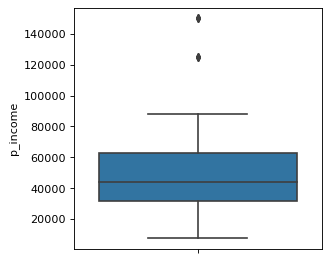

In [14]:
# We can see there are some outliers at the top of the boxplot
plt.figure(figsize = (4,4),dpi=80)
sns.boxplot(data= smdf, y='p_income')

In [15]:
# p_income : mean > median (slightly)
smdf['p_income'].describe()

count       249.000000
mean      48495.983936
std       26996.975337
min        7500.000000
25%       31500.000000
50%       44000.000000
75%       62500.000000
max      150000.000000
Name: p_income, dtype: float64

<AxesSubplot:ylabel='p_income'>

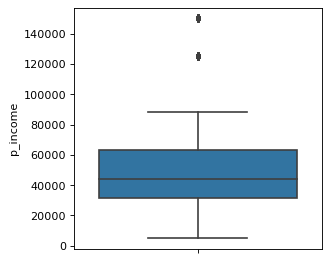

In [16]:
# In bdf, the trend and distribution is similar
plt.figure(figsize = (4,4),dpi=80)
sns.boxplot(data= bdf, y='p_income')

In [17]:
bdf['p_income'].describe()

count      1277.000000
mean      49131.558340
std       27810.816864
min        5000.000000
25%       31500.000000
50%       44000.000000
75%       63000.000000
max      150000.000000
Name: p_income, dtype: float64

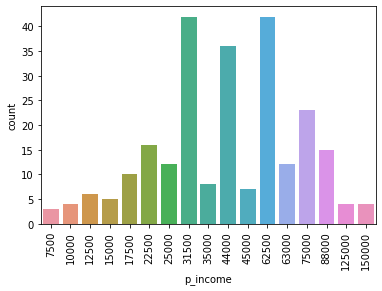

In [18]:
# The distribution of p_income
sns.countplot(data=smdf,x='p_income')
plt.xticks(rotation=90);

### FINDJOB vs p_income
Whether find a civilian job within 6 months

<AxesSubplot:xlabel='FINDJOB', ylabel='p_income'>

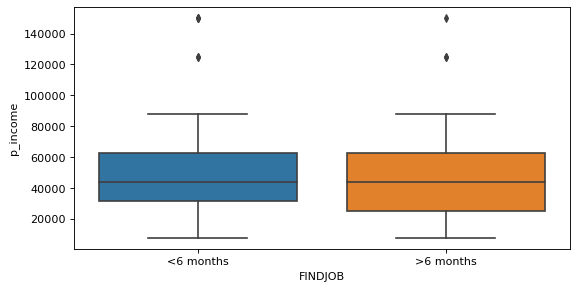

In [19]:
# The median of p_income matches with what we found on Census Brueau 
# "Veteran Employment Outcomes"
# Median income is $44k
# Although two groups of people have the same median
# We can see people who find jobs > 6 months have lower min value 
# There are some outliers above both box plots (who earn 6 figures)
# We will remove them later
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='FINDJOB', y='p_income')

(0.0, 90000.0)

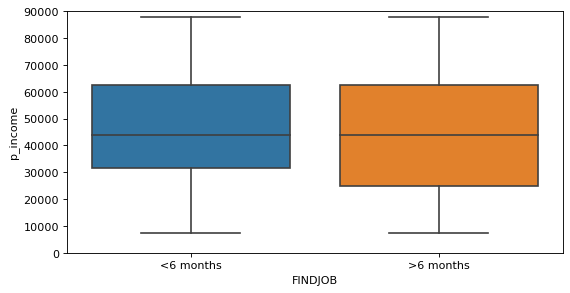

In [20]:
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='FINDJOB', y='p_income')
plt.ylim(0,90000)

In [21]:
# Compare group mean vs median
# We can see veterans who find a job faster have slightly higher mean income(+$4K)
# However, both groups have the same median income of $44k
smdf[smdf['FINDJOB']=='<6 months']['p_income'].describe()

count       149.000000
mean      50167.785235
std       26943.422375
min        7500.000000
25%       31500.000000
50%       44000.000000
75%       62500.000000
max      150000.000000
Name: p_income, dtype: float64

In [22]:
smdf[smdf['FINDJOB']=='>6 months']['p_income'].describe()

count       100.000000
mean      46005.000000
std       27019.306135
min        7500.000000
25%       25000.000000
50%       44000.000000
75%       62500.000000
max      150000.000000
Name: p_income, dtype: float64

### SCHOOL vs p_income
Whether enroll in school after leaving the military

In [23]:
# SCHOOL
smdf['SCHOOL'].value_counts()

Yes    134
No     115
Name: SCHOOL, dtype: int64

<AxesSubplot:xlabel='SCHOOL', ylabel='p_income'>

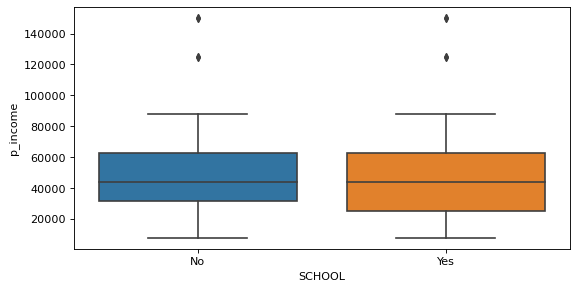

In [24]:
# We can see there's no difference in median income for two groups
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='SCHOOL', y='p_income')

<AxesSubplot:xlabel='SCHOOL', ylabel='p_income'>

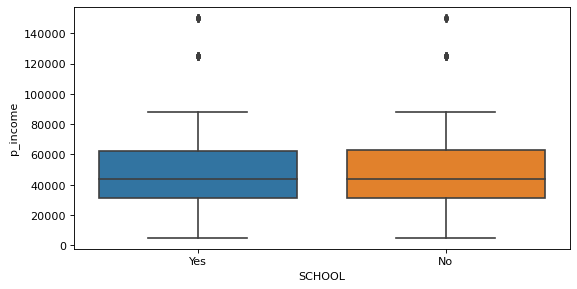

In [25]:
# The result from smdf is consistent with bdf
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= bdf,x='SCHOOL', y='p_income')

### F_EDUCCAT2 vs p_income
Education level

In [26]:
# The school result above is not expected
# However,if we adjust the assumption of going to school to the following 
# Assumption 1: going to school doesn't mean they have a degree
# Assumption 2: Also doesn't specify what type of school they went and what degree they earn
# Thus, we should look into education for more info
smdf['F_EDUCCAT2'].value_counts()

Bachelors degree           75
MS/PHD degree              58
Some college(no degree)    55
Associate degree           38
High school degree         23
Name: F_EDUCCAT2, dtype: int64

<AxesSubplot:xlabel='F_EDUCCAT2', ylabel='p_income'>

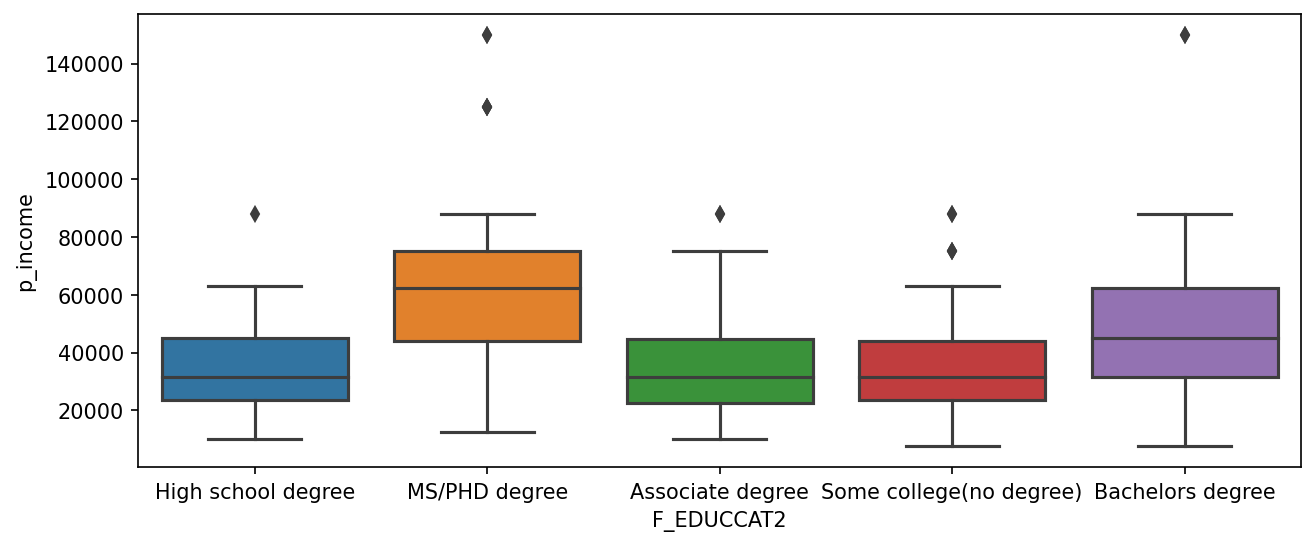

In [27]:
# Veterans who have college degree or higher have higher personal income
# High school has fewer data points, it's probably inaccurate or skewed 
plt.figure(figsize = (10,4),dpi=150)
sns.boxplot(data= smdf,x='F_EDUCCAT2', y='p_income')

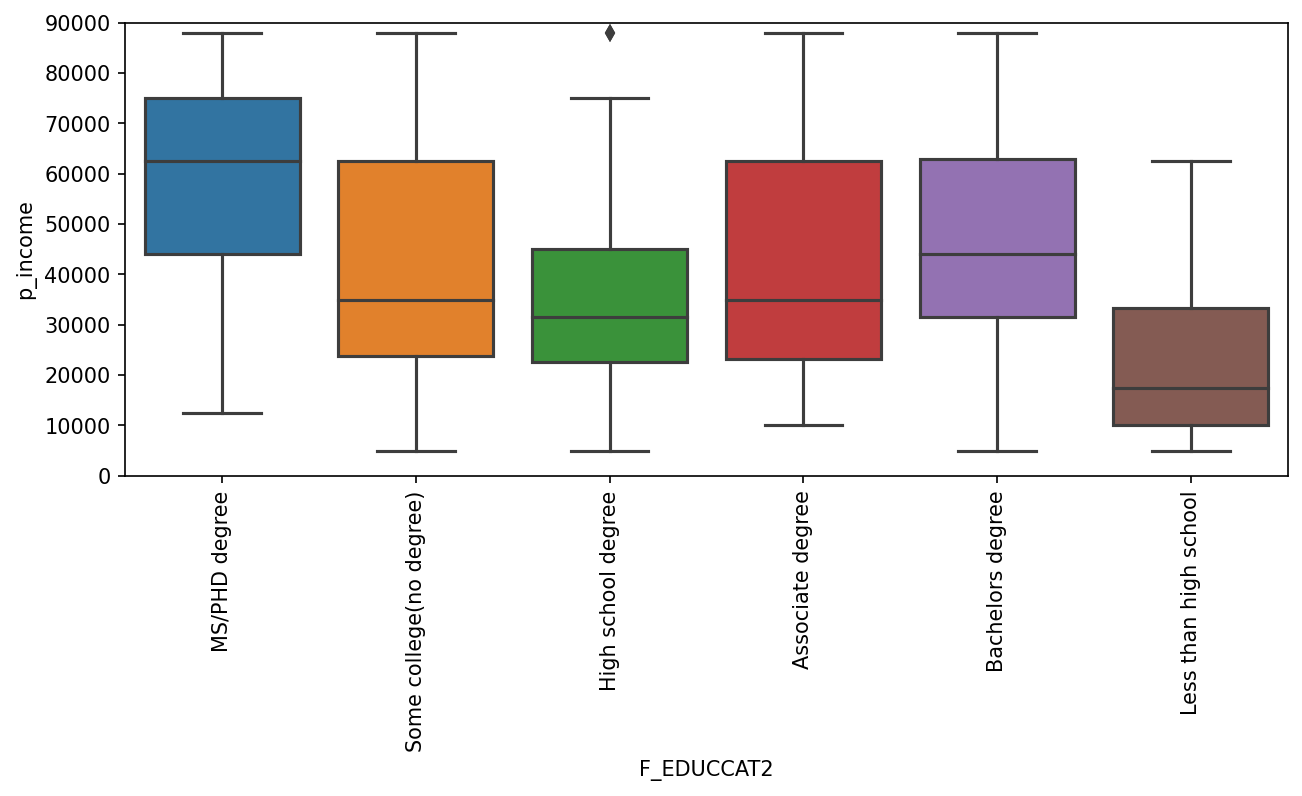

In [28]:
# For bdf, we can see a better trend that people who have higher degrees earn more
plt.figure(figsize = (10,4),dpi=150)
sns.boxplot(data= bdf,x='F_EDUCCAT2', y='p_income')
plt.xticks(rotation=90)
plt.ylim(0,90000);

### SATLIFEb with p_income
Whether satisfied with personal financial situation

In [29]:
# Most people are somewhat satisfied with their life currently (74%)
smdf['SATLIFEb'].value_counts()/len(smdf)

Somewhat Satisfied       0.449799
Very Satisfied           0.297189
Somewhat Dissatisfied    0.168675
Very Dissatisfied        0.084337
Name: SATLIFEb, dtype: float64

<AxesSubplot:xlabel='SATLIFEb', ylabel='count'>

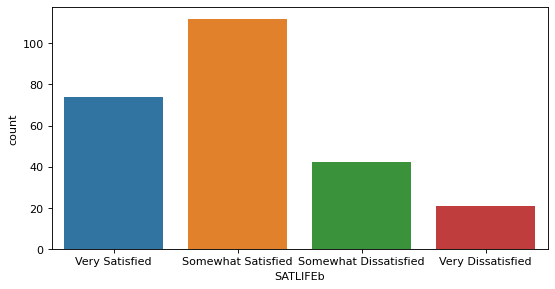

In [30]:
plt.figure(figsize = (8,4),dpi=80)
sns.countplot(data= smdf,x='SATLIFEb')

In [31]:
# bdf shows similar results (77%)
bdf['SATLIFEb'].value_counts()/len(bdf)

Somewhat Satisfied       0.440877
Very Satisfied           0.331245
Somewhat Dissatisfied    0.162099
Very Dissatisfied        0.065779
Name: SATLIFEb, dtype: float64

<AxesSubplot:xlabel='SATLIFEb', ylabel='p_income'>

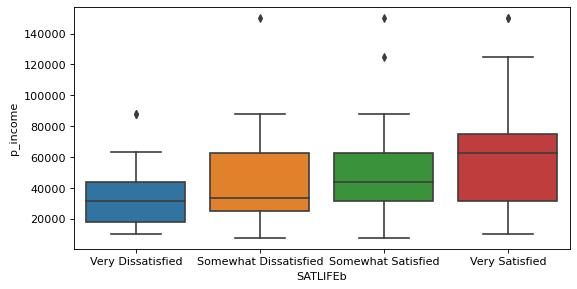

In [32]:
# We can see veterans who answered "somewhat dissatisfied" or "Very Dissatisfied" 
# have lower median income of $35k

# Data from Wage Statistics : 
# 1. $40K-$50k is  at 60-65 percentile  
# 2. $35K is the median income all across USA : 

# when comparing our result with Wage Statistics, we found:
# 1. The median income of general population, $35k,is an unsatisfied level for veterans
# 2. Veterans earn more median income of $45k
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='SATLIFEb', y='p_income',order=['Very Dissatisfied','Somewhat Dissatisfied','Somewhat Satisfied','Very Satisfied'])

<AxesSubplot:xlabel='SATLIFEb', ylabel='p_income'>

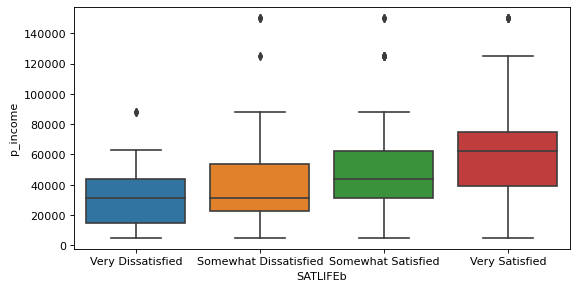

In [33]:
# Let's check whether there's a similar trend in bdf
# The range of boxplot is too wide due to outliers
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= bdf,x='SATLIFEb', y='p_income',order=['Very Dissatisfied','Somewhat Dissatisfied','Somewhat Satisfied','Very Satisfied'])

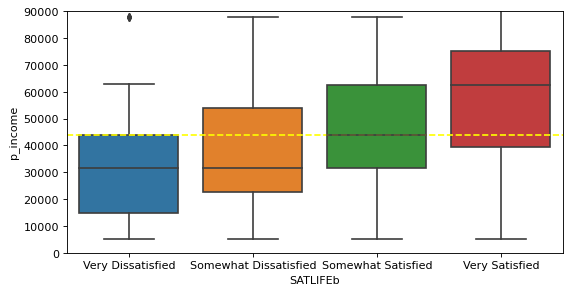

In [34]:
# Let's limit y to 90000
# Veterans who already have a job line up(included in bdf) have similar trend
# Veterans have to earn >45 to be satisfied with their life 
# Veterans who are very satisfied earn around $65 (probably who had a job lined up)
# $65K is 78 percentile in general population
plt.figure(figsize = (8,4),dpi=80)
graph =sns.boxplot(data= bdf,x='SATLIFEb', y='p_income',order=['Very Dissatisfied','Somewhat Dissatisfied','Somewhat Satisfied','Very Satisfied'])
graph.axhline(44000,color='yellow',ls='--')
plt.ylim(0,90000);

### RANK vs p_income
Rank in military

In [35]:
smdf['RANK'].value_counts()

E1-E6      103
E7-E9       97
O1-O10      43
WO1-WO5      6
Name: RANK, dtype: int64

<AxesSubplot:xlabel='RANK', ylabel='p_income'>

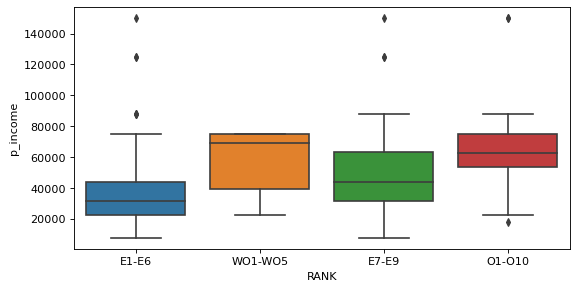

In [36]:
# We can see higher the rank is, higher the p_income
# Veterans who earn lower than $45k(satisfied level): 
# E1-E6:75%, WO1-WO5: 30%, E7-E9: 50%, O1-O10 : 25%
# Officers and Warrent officers' results can be skewed due to few data points
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='RANK', y='p_income')

In [37]:
# Let's check the relationship in bdf(larger dataset)
bdf['RANK'].value_counts()

E1-E6      558
E7-E9      455
O1-O10     247
WO1-WO5     17
Name: RANK, dtype: int64

(0.0, 90000.0)

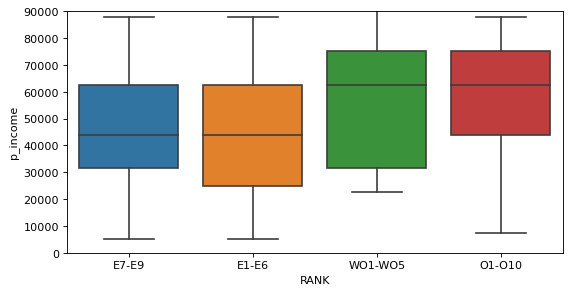

In [38]:
# bdf has higher median for E1-E6(include people who had a job lined up) : $45k
# Veterans who earn lower than $45k(satisfied level): 
# E1-E6:50%, WO1-WO5: 30%, E7-E9: 30%, officer : 25%
# Apparently, veterans who had a job lined up make more
# Especially affect enlisted veterans(E1-E6 and E7-E9)
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= bdf,x='RANK', y='p_income')
plt.ylim(0,90000)

### Branch vs p_income
Branch served on active duty

In [39]:
smdf['Branch'].value_counts()

Army           99
Navy           56
Air_Force      53
Marines        27
Muti-Branch     9
Coast_Guard     5
Name: Branch, dtype: int64

In [40]:
# The composition of branches is consistent with the population of veterans
# Check here: https://www.cfr.org/backgrounder/demographics-us-military
smdf['Branch'].value_counts()/len(smdf)

Army           0.397590
Navy           0.224900
Air_Force      0.212851
Marines        0.108434
Muti-Branch    0.036145
Coast_Guard    0.020080
Name: Branch, dtype: float64

<AxesSubplot:xlabel='Branch', ylabel='p_income'>

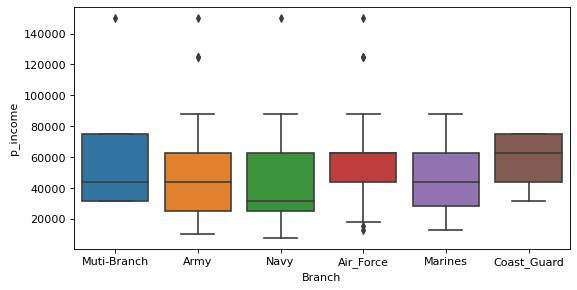

In [41]:
# We can see Navy have the lowest income and Air_Force and Coast_Guard have higher income
# However, there are very few veterans are in Coast_Guard 
# The difference in salary might be related to what skills are transferable 
# we do see people on reddit says Air_Force has the most transferable skills 
# Since Air_Force provides more technical jobs 
# and its culture is more realistic and closer to cilvilian life
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='Branch', y='p_income')

In [42]:
# Let's check whether there's similar trends in bdf
bdf['Branch'].value_counts()

Army           506
Air_Force      306
Navy           278
Marines        125
Muti-Branch     49
Coast_Guard     13
Name: Branch, dtype: int64

In [43]:
bdf['Branch'].value_counts()/len(bdf)

Army           0.396241
Air_Force      0.239624
Navy           0.217698
Marines        0.097886
Muti-Branch    0.038371
Coast_Guard    0.010180
Name: Branch, dtype: float64

(0.0, 90000.0)

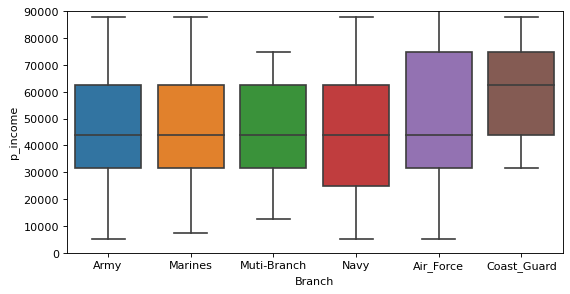

In [44]:
# In bdf, all branches veterans earn the same median salary : $45k after leaving the military
# However, Air_Force still have larger range and max
# Coast_Guard result might still be skewed
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= bdf,x='Branch', y='p_income')
plt.ylim(0,90000)

### CIVADJ vs p_income
Re-adjustment experience to civilian life

In [45]:
# Somewhat easy(68%) vs somewhat difficult(32%)
smdf['CIVADJ'].value_counts()/len(smdf)

Somewhat Easy         0.337349
Somewhat difficult    0.337349
Very Easy             0.184739
Very difficult        0.140562
Name: CIVADJ, dtype: float64

In [46]:
# Somewhat easy(70%) vs somewhat difficult(30%)
bdf['CIVADJ'].value_counts()/len(bdf)

Somewhat Easy         0.370399
Very Easy             0.332811
Somewhat difficult    0.230227
Very difficult        0.066562
Name: CIVADJ, dtype: float64

In [47]:
bdf['Group'].unique()

array(['post_911', 'pre_911'], dtype=object)

In [48]:
# Let's check whether there is a difference for pre-911 and post-911
# pre-911 : Somewhat easy(78%) vs somewhat difficult(22%)
bdf[bdf['Group'] == 'pre_911']['CIVADJ'].value_counts()/len(bdf[bdf['Group'] == 'pre_911'])

Very Easy             0.401009
Somewhat Easy         0.382093
Somewhat difficult    0.179067
Very difficult        0.037831
Name: CIVADJ, dtype: float64

In [49]:
# Let's check whether there is a difference for pre-911 and post-911
# post-911 : Somewhat easy(67%) vs somewhat difficult(33%)
# Obviously, post-911 veterans struggle more than pre-911 veterans in adjusting
bdf[bdf['Group'] == 'post_911']['CIVADJ'].value_counts()/len(bdf[bdf['Group'] == 'post_911'])

Somewhat Easy         0.351240
Somewhat difficult    0.314050
Very Easy             0.221074
Very difficult        0.113636
Name: CIVADJ, dtype: float64

<AxesSubplot:xlabel='CIVADJ', ylabel='p_income'>

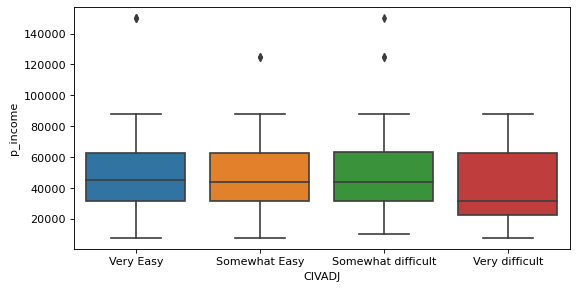

In [50]:
# Veterans who say they have very difficult time to adjust to civilian life
# Earned a median salary of $30k, it's lower than $45(satisfied level)
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='CIVADJ', y='p_income')

(0.0, 90000.0)

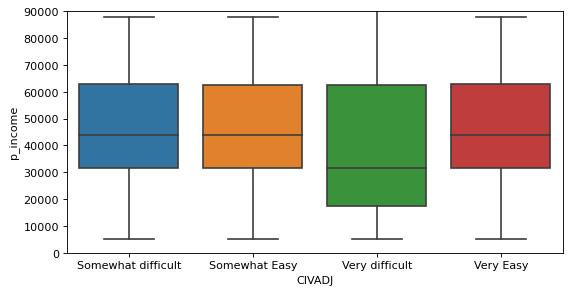

In [51]:
# Check this in bdf
# Similar result to smdf
# People who say they have very difficult time to adjust to civilian life
# Earn a median salary of $35k, it's lower than $45
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= bdf,x='CIVADJ', y='p_income')
plt.ylim(0,90000)

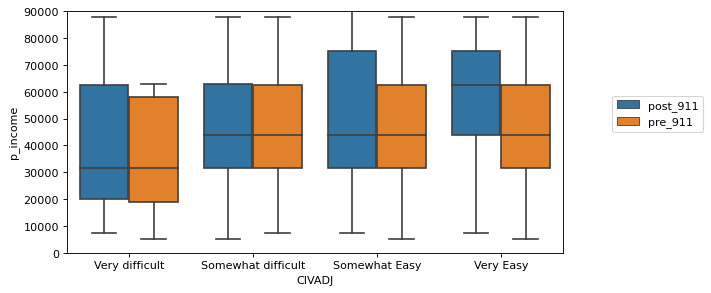

In [52]:
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= bdf,x='CIVADJ', y='p_income',hue='Group',
            order=['Very difficult','Somewhat difficult','Somewhat Easy','Very Easy'])
plt.ylim(0,90000)
plt.legend(loc=(1.1,0.5));

### YEARSERV vs p_income
How many years served on active duty

<AxesSubplot:xlabel='YEARSERV', ylabel='p_income'>

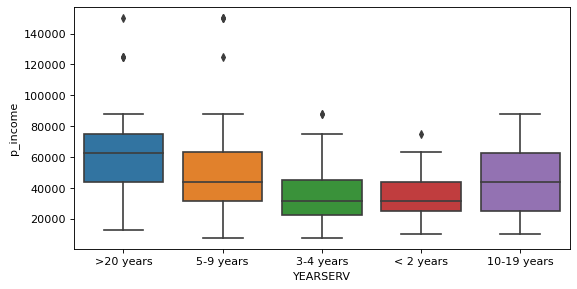

In [53]:
# 1 enlistment is 4-6 years (mostly 4 years)

# For short serving period (<5 years):
# 3-4 years and <2 years people are very likely to struggle with $35k median income

# For moderate serving period(5-19 years):
# 5-19 years median income stay the same as $45k
# We can see similar results here : chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fmilitarypay.defense.gov%2FPortals%2F3%2FDocuments%2F2022%2520Basic%2520Pay%2520Table%2520-%25201%2520Drill%2520Pay.pdf&clen=32463&chunk=true

# For long serving period(>20 years):
# Higher median income of $65k
# This is because they are more experienced 
# and probably have more connections(Higher rank, leadership)

plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='YEARSERV', y='p_income')

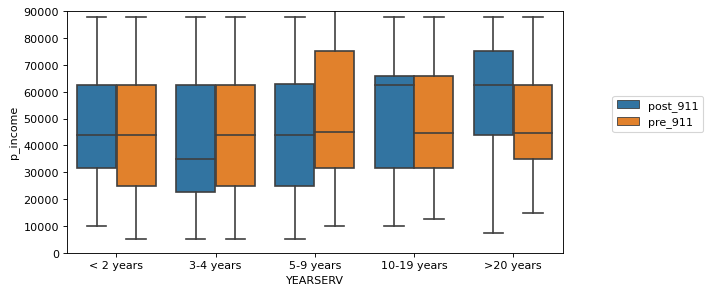

In [54]:
# Let's see whether there's difference btw groups of pre 9/11 and post 9/11
# Pre-911 group has the same median all across differernt year served : $45k
# Post-911 group tend to have lower income for people who served less than 10 years
# and higher income for people who served more than 10 years
# This means,post-911 veterans face more uncertainty on their income 
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= bdf,x='YEARSERV', y='p_income',hue='Group',
            order=['< 2 years','3-4 years','5-9 years','10-19 years','>20 years'])
plt.ylim(0,90000)
plt.legend(loc=(1.1,0.5));

### INJURED vs p_income
whether injured when active

In [55]:
smdf['p_income'].describe()

count       249.000000
mean      48495.983936
std       26996.975337
min        7500.000000
25%       31500.000000
50%       44000.000000
75%       62500.000000
max      150000.000000
Name: p_income, dtype: float64

<AxesSubplot:xlabel='INJURED', ylabel='p_income'>

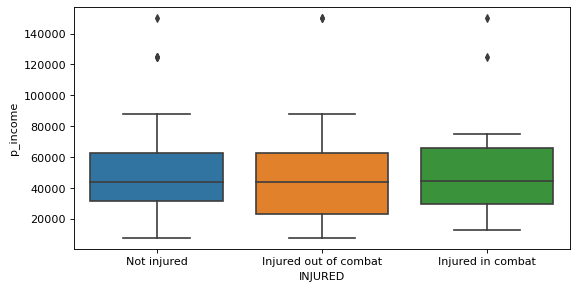

In [56]:
# Being injured has lower pay($5k in difference)
# There's no difference where veterans got injured(in or out of combat)
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='INJURED', y='p_income')

In [57]:
bdf['p_income'].describe()

count      1277.000000
mean      49131.558340
std       27810.816864
min        5000.000000
25%       31500.000000
50%       44000.000000
75%       63000.000000
max      150000.000000
Name: p_income, dtype: float64

<AxesSubplot:xlabel='INJURED', ylabel='p_income'>

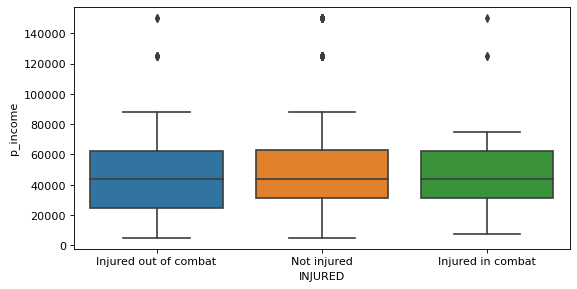

In [58]:
# In bdf, there's no difference in median income among groups
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= bdf,x='INJURED', y='p_income')

### TRAUMA1 vs p_income
Whether have trauma due to the military

In [59]:
# Half of the post-911 veterans who don't have job lined up have trauma
smdf['TRAUMA1'].value_counts()

No     125
Yes    124
Name: TRAUMA1, dtype: int64

<AxesSubplot:xlabel='TRAUMA1', ylabel='p_income'>

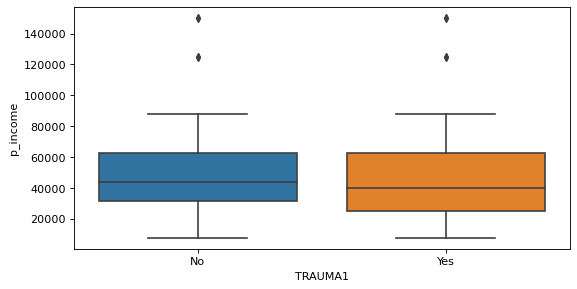

In [61]:
# People who have Trauma has lower pay ($10k difference)
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='TRAUMA1', y='p_income')

(0.0, 100000.0)

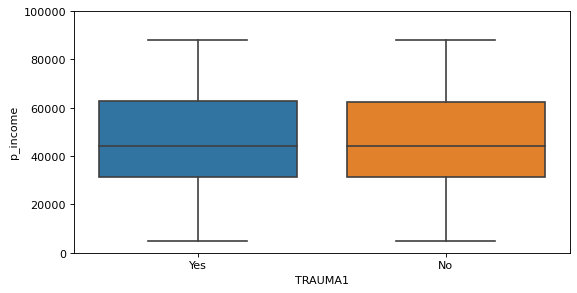

In [62]:
# When including veterans who have job lined up, there's no difference in p_income
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= bdf,x='TRAUMA1', y='p_income')
plt.ylim(0,100000)

(0.0, 100000.0)

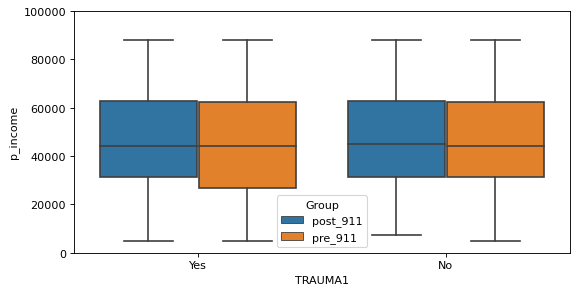

In [63]:
# Almost no difference in two groups
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= bdf,x='TRAUMA1', y='p_income',hue='Group')
plt.ylim(0,100000)

### F_AGECAT vs p_income
Age categories

In [64]:
smdf['F_AGECAT'].value_counts()

30-49    142
50-64     73
65+       21
18-29     13
Name: F_AGECAT, dtype: int64

In [65]:
bdf['F_AGECAT'].value_counts()

65+      530
50-64    387
30-49    331
18-29     29
Name: F_AGECAT, dtype: int64

<AxesSubplot:xlabel='F_AGECAT', ylabel='p_income'>

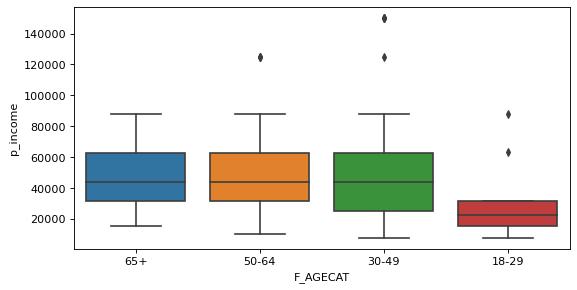

In [66]:
# Young people struggle a lot
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='F_AGECAT', y='p_income')

(0.0, 130000.0)

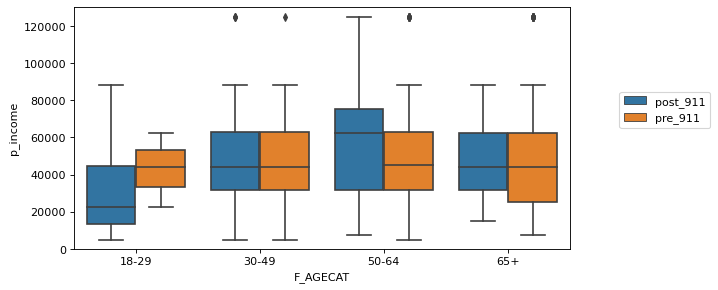

In [67]:
# Seems age affect post_911 veterans more
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= bdf,x='F_AGECAT', y='p_income',hue='Group',order=['18-29','30-49','50-64','65+'])
plt.legend(loc=(1.1,0.5))
plt.ylim(0,130000)

### LOOKJOB vs p_income
Whether look for a civilian job right away or not right away

<AxesSubplot:xlabel='LOOKJOB', ylabel='p_income'>

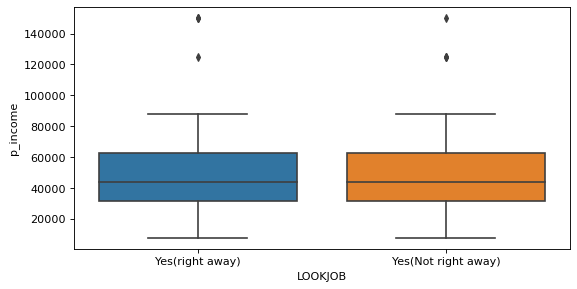

In [68]:
# People who look for job right away or later doesn't have difference in salary
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='LOOKJOB', y='p_income')

### VABENEFITS vs p_income
Whether received VA benefits after leaving the military, including disability compensation, pension, education and training, health care, home loans, insurance, Veteran Readiness and Employment, and burial

In [69]:
# Most people receive VA benefits (85%)
smdf['VABENEFITS'].value_counts()

Yes    211
No      38
Name: VABENEFITS, dtype: int64

In [70]:
smdf['VABENEFITS'].value_counts()/len(smdf)

Yes    0.84739
No     0.15261
Name: VABENEFITS, dtype: float64

In [71]:
bdf['VABENEFITS'].value_counts()/len(bdf)

Yes    0.769773
No     0.230227
Name: VABENEFITS, dtype: float64

<AxesSubplot:xlabel='VABENEFITS', ylabel='p_income'>

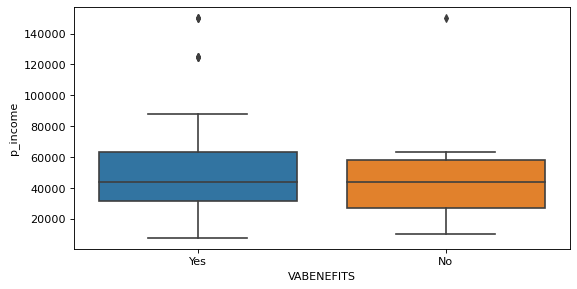

In [72]:
# Veterans who received VA benefits have higher potential on p_income
# Although the median salary is the same for the two groups, 
# top 25% of people who don't use VA benefits doesn't make much more than the median
# No: Q1,Q3, and max are lower
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='VABENEFITS', y='p_income')

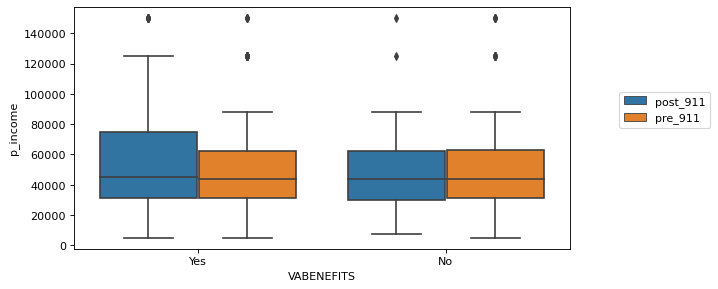

In [73]:
# For bdf, receive VA benefits makes no difference in median p_income
# However, we can see it's better for post-911 group to get  VA benefits l
# This leads to higher salary potential(wider range and max)
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= bdf,x='VABENEFITS', y='p_income',hue='Group')
plt.legend(loc=(1.1,0.5))

### MILHELPJOB vs p_income
whether serving in the military help or hurt(perceived subjectively) a veteran's ability to get a civilian job

In [74]:
smdf['MILHELPJOB'].value_counts()

Neither         88
Helped a lot    86
Helped a bit    60
hurt a bit       9
hurt a lot       6
Name: MILHELPJOB, dtype: int64

In [75]:
# 59% of post-911 veterans think it helped
# 41% of them think it didn't help
smdf['MILHELPJOB'].value_counts()/len(smdf)

Neither         0.353414
Helped a lot    0.345382
Helped a bit    0.240964
hurt a bit      0.036145
hurt a lot      0.024096
Name: MILHELPJOB, dtype: float64

<AxesSubplot:xlabel='MILHELPJOB', ylabel='p_income'>

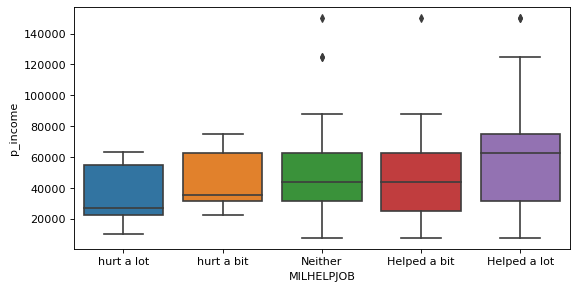

In [76]:
# Only veterans who earn more than $45k think military experience helped them to find civilian jobs
# People who earn less than $45k think 
# their military skills dont' help them to get a civilian job
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='MILHELPJOB', y='p_income',
            order=['hurt a lot','hurt a bit','Neither','Helped a bit','Helped a lot'])

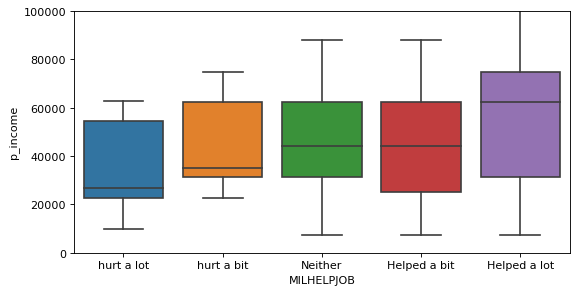

In [77]:
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='MILHELPJOB', y='p_income',
            order=['hurt a lot','hurt a bit','Neither','Helped a bit','Helped a lot'])
plt.ylim(0,100000);

### JOBQUAL vs p_income
Whether the first civilian job made a veteran feel like he/she was overqualified

In [78]:
# Most veterans think they're overqualified for the first civilian job(51%)
smdf['JOBQUAL'].value_counts()

Overqualified     126
Just right         93
Underqualified     30
Name: JOBQUAL, dtype: int64

In [79]:
smdf['JOBQUAL'].value_counts()/len(smdf)

Overqualified     0.506024
Just right        0.373494
Underqualified    0.120482
Name: JOBQUAL, dtype: float64

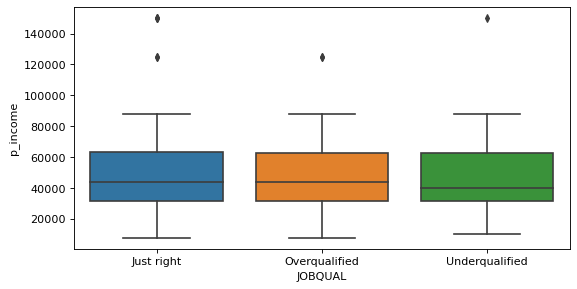

In [80]:
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='JOBQUAL', y='p_income');

### FIRSTJOB vs p_income
How long did veterans stay at the first job

In [81]:
# Half of veterans left their first job after a year(54%)
# Almost Half of veterans left their first job within a year
smdf['FIRSTJOB'].value_counts()

> 1 yr           133
6 months- 1yr     60
< 6 months        56
Name: FIRSTJOB, dtype: int64

In [82]:
smdf['FIRSTJOB'].value_counts()/len(smdf)

> 1 yr           0.534137
6 months- 1yr    0.240964
< 6 months       0.224900
Name: FIRSTJOB, dtype: float64

<AxesSubplot:xlabel='FIRSTJOB', ylabel='p_income'>

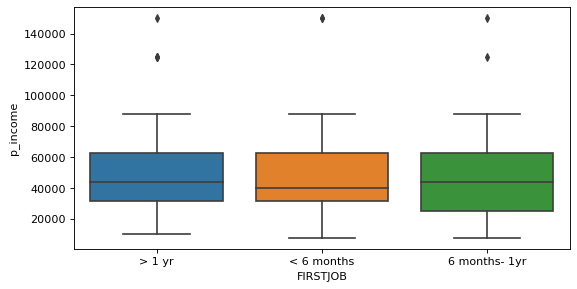

In [83]:
# Veterans who left their first jobs < 6 months have lower median pay (<$45k)
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='FIRSTJOB', y='p_income')

(0.0, 80000.0)

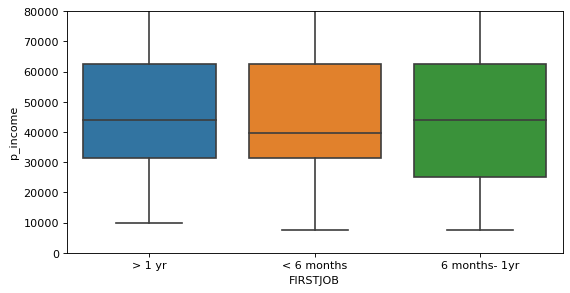

In [84]:
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='FIRSTJOB', y='p_income')
plt.ylim(0,80000)

In [85]:
smdf.columns

Index(['SATLIFEb', 'YEARSERV', 'RANK', 'MARRACTIV', 'PARACTIV', 'COMBAT',
       'INJURED', 'MILTOCIV', 'CIVADJ', 'VABENEFITS', 'CIVADJPROBa',
       'CIVADJPROBb', 'CIVADJISSc', 'CIVADJISSe', 'LOOKJOB', 'SCHOOL',
       'MILJOBSKILLS', 'FINDJOB', 'JOBQUAL', 'FIRSTJOB', 'MILHELPJOB',
       'TRAUMA1', 'F_AGECAT', 'F_SEX', 'F_EDUCCAT2', 'F_HISP', 'F_RACETHN',
       'F_MARITAL', 'Branch', 'p_income'],
      dtype='object')

### F_RACETHN vs p_income
Race

In [86]:
smdf['F_RACETHN'].value_counts()

White         167
Asian          44
Black          23
Mixed race     15
Name: F_RACETHN, dtype: int64

<AxesSubplot:xlabel='F_RACETHN', ylabel='p_income'>

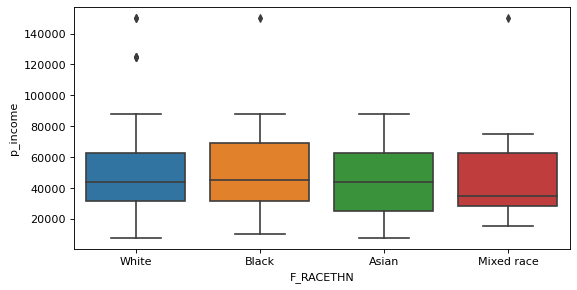

In [87]:
# Mixed race data could be distorted since it only has few data points
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='F_RACETHN', y='p_income')

# Step 4 : Preprocessing for ML : Stage 1
This section is divided into 2 parts : 
- Remove outliers and unwanted columns
- Data transformation

## 1. Removing Outliers and Unwanted Columns from smdf 

In this section, Our goal is to prepare data for machine learning models. We will only use data from smdf since these are veterans who answered FINDJOB. Respondants started with 249 and decreased to 241 after outliers were removed. We used boxplots to detect outliers in our data and removed data points which are below (Q1-1.5IQR) or above (Q3+1.5IQR).

The methods of detecting outliers are listed below:
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

In [88]:
smdf.columns

Index(['SATLIFEb', 'YEARSERV', 'RANK', 'MARRACTIV', 'PARACTIV', 'COMBAT',
       'INJURED', 'MILTOCIV', 'CIVADJ', 'VABENEFITS', 'CIVADJPROBa',
       'CIVADJPROBb', 'CIVADJISSc', 'CIVADJISSe', 'LOOKJOB', 'SCHOOL',
       'MILJOBSKILLS', 'FINDJOB', 'JOBQUAL', 'FIRSTJOB', 'MILHELPJOB',
       'TRAUMA1', 'F_AGECAT', 'F_SEX', 'F_EDUCCAT2', 'F_HISP', 'F_RACETHN',
       'F_MARITAL', 'Branch', 'p_income'],
      dtype='object')

In [89]:
# Number of columns
len(smdf.columns)

30

In [90]:
# Need to remove "SATLIFEb","JOBQUAL","FIRSTJOB"
# These don't predict "FINDJOB"
smdf= smdf.drop(["SATLIFEb","JOBQUAL","FIRSTJOB"],axis=1)

In [91]:
len(smdf.columns)

27

In [92]:
# Number of rows
len(smdf)

249

<AxesSubplot:xlabel='FINDJOB', ylabel='p_income'>

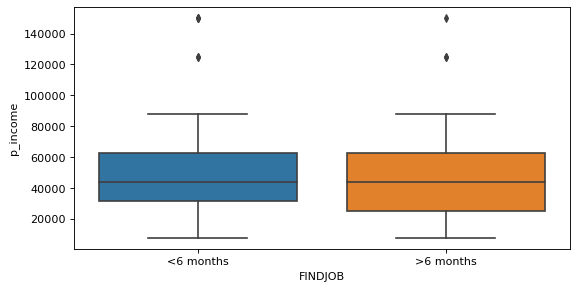

In [93]:
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='FINDJOB', y='p_income')

In [94]:
# We can on the box plot above, outliers are probably 6 figures earners
# 4% of veterans in bdf earned 6 figures
len(smdf[smdf['p_income']>100000])/len(smdf)

0.0321285140562249

In [95]:
# Detect outliers with IQR score on p_income
Q1 = smdf['p_income'].quantile(0.25)
Q3 = smdf['p_income'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

31000.0


In [96]:
# There are no outliers on the lower end of p_income
smdf[smdf['p_income']<(Q1-1.5*IQR)]

,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,VABENEFITS,CIVADJPROBa,...,MILHELPJOB,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Branch,p_income


In [97]:
# There are 8 outliers on the higher end of p_income
Prob_outliers = smdf[smdf['p_income']>(Q3+1.5*IQR)]
Prob_outliers

,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,VABENEFITS,CIVADJPROBa,...,MILHELPJOB,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Branch,p_income
51,>20 years,E1-E6,Married,No,Yes,Not injured,Somewhat well,Somewhat difficult,Yes,No,...,Helped a lot,No,50-64,Male,MS/PHD degree,No,White,Divorced/Seperated/Widowed,Air_Force,125000
89,5-9 years,O1-O10,Not Married,No,Yes,Not injured,Somewhat well,Very Easy,No,No,...,Helped a lot,No,30-49,Male,Bachelors degree,No,White,Never Married,Army,150000
115,>20 years,O1-O10,Married,Yes,Yes,Injured out of combat,Very well,Very Easy,Yes,No,...,Helped a lot,No,30-49,Male,MS/PHD degree,No,White,Divorced/Seperated/Widowed,Air_Force,150000
138,5-9 years,E1-E6,Married,No,Yes,Injured in combat,Somewhat well,Very Easy,Yes,Yes,...,Neither,Yes,30-49,Male,MS/PHD degree,No,Black,Divorced/Seperated/Widowed,Muti-Branch,150000
160,>20 years,E7-E9,Married,Yes,Yes,Injured in combat,Not too well,Somewhat difficult,Yes,No,...,Neither,Yes,50-64,Male,MS/PHD degree,No,White,Divorced/Seperated/Widowed,Army,125000
203,5-9 years,E7-E9,Not Married,No,Yes,Not injured,Somewhat well,Somewhat Easy,Yes,No,...,Helped a lot,Yes,30-49,Male,MS/PHD degree,No,White,Never Married,Army,125000
210,5-9 years,E7-E9,Not Married,No,Yes,Injured out of combat,Not too well,Somewhat difficult,Yes,Yes,...,Helped a bit,Yes,30-49,Male,Bachelors degree,No,Mixed race,Divorced/Seperated/Widowed,Navy,150000
221,>20 years,E1-E6,Married,Yes,Yes,Not injured,Very well,Somewhat Easy,Yes,No,...,Neither,No,50-64,Female,MS/PHD degree,No,White,Divorced/Seperated/Widowed,Air_Force,125000


In [98]:
# Remove outliers from smdf
smdf = smdf.drop(Prob_outliers.index,axis=0)

In [99]:
len(smdf)

241

(0.0, 90000.0)

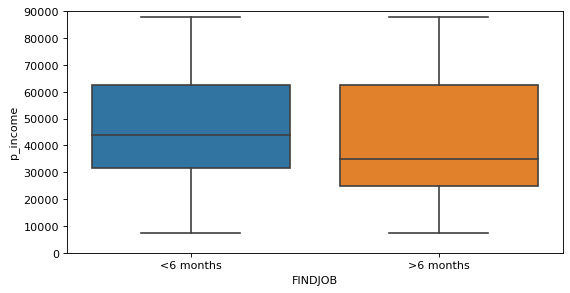

In [100]:
# After dropping outliers, we can see the median for >6 months became lower as $35k
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= smdf,x='FINDJOB', y='p_income')
plt.ylim(0,90000)

### Save files

In [101]:
smdf.to_csv("Findjob_no_outliers.csv",index=False)